In [1]:
# We'd like to know how many of each machine were rented out on a given day.
# Since we want to join our machine-specific csvs with the Dates csv in SQL, we'll use this notebook to 
# create appropriate fields for rental start and end.
import pandas as pd
import numpy as np
import seaborn as sns

# Let's start by importing our all_rentals csv and splitting it up by machine, since it's already clean.
all_df = pd.read_csv('all_rentals.csv')
all_df.head()


,Unnamed: 0,Product ID,Order created,Rental start,Rental end,Vendor ID,Customer ID,duration,prod_class
0,0,100001093,2008-06-09 08:29:14.4530000,2008-06-08 22:00:00,2008-06-09 21:59:59,43,165137,0.999988,aerator
1,1,100001093,2008-05-17 10:49:31.3270000,2008-05-16 22:00:00,2008-05-17 21:59:59,43,64659,0.999988,aerator
2,2,100001093,2008-05-15 08:38:37.6100000,2008-05-14 22:00:00,2008-05-15 21:59:59,43,162629,0.999988,aerator
3,3,100001093,2008-04-07 06:34:40.9830000,2008-04-06 22:00:00,2008-04-07 21:59:59,43,64482,0.999988,aerator
4,4,100001093,2008-04-08 14:19:58.5930000,2008-04-08 22:00:00,2008-04-09 21:59:59,43,158672,0.999988,aerator


In [2]:
# Let's check our datatypes.
all_df.info()

# Looks like our Rental start and end dates have reverted to object format again. Let's change them!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33764 entries, 0 to 33763
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     33764 non-null  int64  
 1   Product ID     33764 non-null  int64  
 2   Order created  33764 non-null  object 
 3   Rental start   33764 non-null  object 
 4   Rental end     33764 non-null  object 
 5   Vendor ID      33764 non-null  int64  
 6   Customer ID    33764 non-null  int64  
 7   duration       33764 non-null  float64
 8   prod_class     33764 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.3+ MB


In [3]:
# Let's take just the part we want, in string form, and move it to new columns.
# We'll drop the originals and the timestamps, too.
all_df[['rental_start', 'rt1']] = all_df['Rental start'].str.split(' ', n=1, expand=True)
all_df[['rental_end', 'rt2']] = all_df['Rental end'].str.split(' ', n=1, expand=True)
all_df = all_df.drop(['rt1', 'rt2', 'Rental start', 'Rental end'], axis=1)

all_df.head()

# Ok, the format is how we want it, but let's change the datatype, too.


,Unnamed: 0,Product ID,Order created,Vendor ID,Customer ID,duration,prod_class,rental_start,rental_end
0,0,100001093,2008-06-09 08:29:14.4530000,43,165137,0.999988,aerator,2008-06-08,2008-06-09
1,1,100001093,2008-05-17 10:49:31.3270000,43,64659,0.999988,aerator,2008-05-16,2008-05-17
2,2,100001093,2008-05-15 08:38:37.6100000,43,162629,0.999988,aerator,2008-05-14,2008-05-15
3,3,100001093,2008-04-07 06:34:40.9830000,43,64482,0.999988,aerator,2008-04-06,2008-04-07
4,4,100001093,2008-04-08 14:19:58.5930000,43,158672,0.999988,aerator,2008-04-08,2008-04-09


In [5]:
# Now we'll convert them to datetime and make sure they're the correct format.
all_df['rental_start'] = pd.to_datetime(all_df['rental_start'])
all_df['rental_end'] = pd.to_datetime(all_df['rental_end'])
all_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33764 entries, 0 to 33763
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     33764 non-null  int64         
 1   Product ID     33764 non-null  int64         
 2   Order created  33764 non-null  object        
 3   Vendor ID      33764 non-null  int64         
 4   Customer ID    33764 non-null  int64         
 5   duration       33764 non-null  float64       
 6   prod_class     33764 non-null  object        
 7   rental_start   33764 non-null  datetime64[ns]
 8   rental_end     33764 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


<AxesSubplot:xlabel='rental_start', ylabel='Count'>

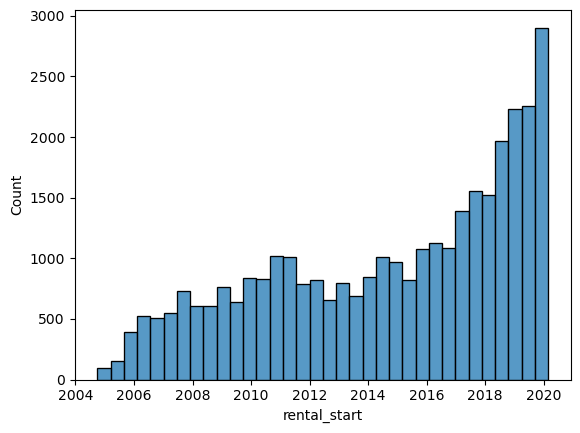

In [6]:
# Let's take a quick peek at the distribution of rentals over time.
sns.histplot(all_df, x='rental_start')

# Neat!


In [7]:
# Splittling the combined csv into the different product classes, since it's already clean and 
# we'll want to analyze safety stock by machine.

aerator_df = all_df.loc[all_df['prod_class'] == 'aerator']
dehum_df = all_df.loc[all_df['prod_class'] == 'dehumidifier']
forklift_df = all_df.loc[all_df['prod_class'] == 'forklift']
heater_df = all_df.loc[all_df['prod_class'] == 'heater']
minid_df = all_df.loc[all_df['prod_class'] == 'minidumper']
pipe_df = all_df.loc[all_df['prod_class'] == 'pipepressing']

pipe_df.head()
    

,Unnamed: 0,Product ID,Order created,Vendor ID,Customer ID,duration,prod_class,rental_start,rental_end
21540,0,100001909,2014-08-08 08:43:58.3370000,195,293046,3.999988,pipepressing,2014-08-07,2014-08-11
21541,1,100001909,2014-08-13 05:07:41.6670000,195,292966,0.999988,pipepressing,2014-08-12,2014-08-13
21542,2,100001909,2016-07-01 08:04:09.3905737,195,302355,0.999988,pipepressing,2016-06-30,2016-07-01
21543,3,100001909,2014-09-10 05:01:40.6070000,195,293047,0.999988,pipepressing,2014-09-09,2014-09-10
21544,4,100001909,2014-11-07 08:47:58.6070000,195,293017,35.999988,pipepressing,2014-11-06,2014-12-12


In [8]:
# Ok, I've created a csv of every date included in the all_rentals csv.
# My intention is to use it to track how many machines were rented out per day.
dates_df = pd.read_csv('Dates - Sheet1.csv')
dates_df.head()


,Date,Day,Month,Year
0,30/10/2004,30,10,2004
1,31/10/2004,31,10,2004
2,01/11/2004,1,11,2004
3,02/11/2004,2,11,2004
4,03/11/2004,3,11,2004


In [9]:
# Let's make sure 'Date' is in datetime format.
dates_df['Date'] = pd.to_datetime(dates_df['Date'])
dates_df.head()


C:\Users\samia\AppData\Local\Temp\ipykernel_3120\3940368359.py:2: UserWarning: Parsing '30/10/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dates_df['Date'] = pd.to_datetime(dates_df['Date'])
C:\Users\samia\AppData\Local\Temp\ipykernel_3120\3940368359.py:2: UserWarning: Parsing '31/10/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dates_df['Date'] = pd.to_datetime(dates_df['Date'])
C:\Users\samia\AppData\Local\Temp\ipykernel_3120\3940368359.py:2: UserWarning: Parsing '13/11/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dates_df['Date'] = pd.to_datetime(dates_df['Date'])
C:\Users\samia\AppData\Local\Temp\ipykernel_3120\3940368359.py:2: UserWarning: Parsing '14/11/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dates_df['Date'] = pd.to_datetime(dates_

,Date,Day,Month,Year
0,2004-10-30,30,10,2004
1,2004-10-31,31,10,2004
2,2004-01-11,1,11,2004
3,2004-02-11,2,11,2004
4,2004-03-11,3,11,2004


In [10]:
dates_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6336 non-null   datetime64[ns]
 1   Day     6336 non-null   int64         
 2   Month   6336 non-null   int64         
 3   Year    6336 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 198.1 KB


In [11]:
# Ok, now we'll make a list of dates where each machine was rented out, to ultimately count them and 
# know how many of each type of machine was rented out on a given day.

aerator_date_range = []

for i in range(len(aerator_df)):
    dates = pd.date_range(start=aerator_df['rental_start'][i], end=aerator_df['rental_end'][i])
    aerator_date_range.append(dates)
    
aer_flat_dates = [item for sublist in aerator_date_range for item in sublist]

aer_date_series = pd.Series(data=aer_flat_dates)

aer_dates_counts = pd.DataFrame(aer_date_series.value_counts())

# aer_dates_counts.to_csv('aer_dates_counts.csv')

# aer_dates_counts.sort_values(by=1)
# aer_dates_counts.head()
# print(aer_dates_counts.columns.values.tolist())
print(len(aer_dates_counts))


[0]


In [24]:
dehum_date_range = []

# for i in range(len(dehum_df)):
#     dates = pd.date_range(start=dehum_df['rental_start'][i], end=dehum_df['rental_end'][i])
#     dehum_date_range.append(dates)
    
dehum_df['rental_start'].head()

# dehum_flat_dates = [item for sublist in dehum_date_range for item in sublist]

# dehum_date_series = pd.Series(data=dehum_flat_dates)

# dehum_dates_counts = pd.DataFrame(dehum_date_series.value_counts())

# dehum_dates_counts.to_csv('dehum_dates_counts.csv')

# dehum_dates_counts.sort_values(by=1)
# dehum_dates_counts.head()
# print(dehum_dates_counts.columns.values.tolist())
# print(len(dehum_dates_counts))


1368   2008-07-21
1369   2008-09-02
1370   2009-09-20
1371   2008-04-14
1372   2009-08-09
Name: rental_start, dtype: datetime64[ns]